## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    5.2M reviews and 11M tips by 1.3M users for 174K businesses
    1.2M business attributes, e.g., hours, parking availability, ambience
    Aggregated check-ins over time for each of the 174K businesses
    200,000 pictures from the included businesses
    11 metropolitan areas

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland
    
Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the data into Pandas at a time takes long

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'business.json',
    'checkin.json',
    'review.json',
    'tip.json',
    'user.json',
]

#### Review

In [3]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw


#### Business

In [4]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [5]:
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


#### Filter a subset

We filter for restaurants in Las Vegas only because large dataset will crash using a single machine power

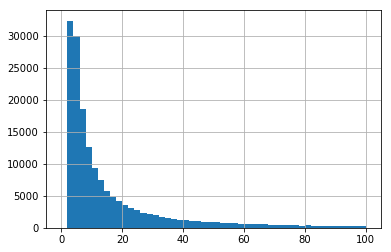

In [32]:
df_business['review_count'].hist(bins = 50, range = (0,100))

In [65]:
# filter city Las Vegas
cond_city = df_business['city'] == 'Las Vegas'
# filter category not null
cond_category_not_null = ~df_business['categories'].isnull()
# filter restaurants category
cond_category_restaurant = df_business['categories'].apply(str).str.contains('Restaurants')
# filter review count > 10
cond_review_count = df_business['review_count'] > 10

In [66]:
df_vegas = df_business[cond_city & cond_category_not_null & cond_category_restaurant & cond_review_count]

In [67]:
## Create category feature vector
category_list = []
for row in df_vegas['categories']:
    for i in row:
        category_list.append(i)
        
category_list = list(set(category_list))

def feature_vector(category):
    lst = [1 if category in row else 0 for row in df_vegas['categories']]
    return lst

vec_list = [feature_vector(category) for category in category_list]
feature_df = pd.DataFrame(vec_list).transpose()
feature_df.columns = category_list
feature_df.head()

,Food Delivery Services,Golf,Pop-Up Restaurants,Pan Asian,Cafes,Honduran,Basque,Convenience Stores,Financial Services,Dry Cleaning,...,Cantonese,Bagels,Car Window Tinting,Wedding Chapels,Cupcakes,Aircraft Repairs,Bulgarian,Family Practice,Wine Bars,Auto Insurance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
feature_df['American'] = feature_df['American (Traditional)'] + feature_df['American (New)']
others = feature_df['American'] + feature_df['Fast Food'] + feature_df['Mexican'] + feature_df['Chinese'] + feature_df['Italian'] + feature_df['Japanese']
a = [1 if x == 0 else 0 for x in others]
feature_df['Others'] = a

In [69]:
selected_feature = [u'American',u'Fast Food',u'Mexican',u'Chinese',u'Italian', u'Japanese', u'Others']
df_feature = feature_df[selected_feature]
df_feature.columns = ['american','fast_food','mexican','chinese','italian','japanese','others']

In [70]:
df_feature.head()

,american,fast_food,mexican,chinese,italian,japanese,others
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [71]:
df_feature.shape

(4726, 7)

In [72]:
df_feature.apply(lambda x: sum(x))

american     1181
fast_food     677
mexican       597
chinese       361
italian       326
japanese      306
others       1807
dtype: int64

In [110]:
print(df_vegas.loc[52,'attributes'])

{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseLevel': 'average', 'RestaurantsAttire': 'casual', 'BusinessAcceptsCreditCards': True, 'Music': {'dj': False, 'background_music': True, 'no_music': False, 'karaoke': False, 'live': False, 'video': False, 'jukebox': False}, 'Ambience': {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}, 'RestaurantsGoodForGroups': True, 'Caters': True, 'WiFi': 'free', 'RestaurantsReservations': False, 'RestaurantsTableService': True, 'RestaurantsTakeOut': True, 'GoodForKids': True, 'HappyHour': True, 'GoodForDancing': False, 'BikeParking': True, 'OutdoorSeating': False, 'RestaurantsPriceRange2': 2, 'RestaurantsDelivery': False, 'BestNights': {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': True, 'thursday': False, 'sunday': False, 'saturday': False}, 'GoodForMeal': {'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, '

In [111]:
## Create attribute feature vector
classy = []
upscale = []
casual = []
wifi = []
noise = []
happy_hour = []
brunch = []
latenight = []
dinner = []
lunch = []

for row in df_vegas.attributes:
    classy.append(row.get('Ambience',{}).get('classy'))

for row in df_vegas.attributes:
    upscale.append(row.get('Ambience',{}).get('upscale'))
    
for row in df_vegas.attributes:
    casual.append(row.get('Ambience',{}).get('casual'))

for row in df_vegas.attributes:
    wifi.append(row.get('WiFi'))

for row in df_vegas.attributes:
    noise.append(row.get('NoiseLevel'))
    
for row in df_vegas.attributes:
    happy_hour.append(row.get('HappyHour'))
    
for row in df_vegas.attributes:
    brunch.append(row.get('GoodForMeal',{}).get('brunch'))
    
for row in df_vegas.attributes:
    latenight.append(row.get('GoodForMeal',{}).get('latenight'))    
    
for row in df_vegas.attributes:
    dinner.append(row.get('GoodForMeal',{}).get('dinner'))

for row in df_vegas.attributes:
    lunch.append(row.get('GoodForMeal',{}).get('lunch'))

    
romantic = [1 if x == True else 0 for x in romantic ]
casual = [1 if x == True else 0 for x in casual]
upscale = [1 if x == True else 0 for x in upscale]
classy = [1 if x == True else 0 for x in classy]
open_24 = [1 if x == True else 0 for x in open_24]
wifi = [1 if x == True else 0 for x in wifi]
happy_hour = [1 if x == True else 0 for x in happy_hour]
brunch = [1 if x == True else 0 for x in brunch]
dinner = [1 if x == True else 0 for x in dinner]
latenight = [1 if x == True else 0 for x in latenight]
lunch = [1 if x == True else 0 for x in lunch]


noise_level = []

for x in noise:
    if x == 'quiet':
        noise_level.append(1)
    elif x == 'average':
        noise_level.append(2)
    elif x == 'loud':
        noise_level.append(3)
    else:
        noise_level.append(4)

In [112]:
pd.options.mode.chained_assignment = None 
df_feature.loc[:,'casual'] = casual
df_feature.loc[:,'classy'] = classy
df_feature.loc[:,'upscale'] = upscale
df_feature.loc[:,'noise_level'] = noise_level
df_feature.loc[:,'business_id'] = df_vegas['business_id'].values
df_feature.loc[:,'happy_hour'] = happy_hour
df_feature.loc[:,'latenight'] = latenight
df_feature.loc[:,'brunch'] = brunch
df_feature.loc[:,'dinner'] = dinner
df_feature.loc[:,'lunch'] = lunch

In [113]:
df_feature.head()

,american,fast_food,mexican,chinese,italian,japanese,others,casual,classy,upscale,noise_level,business_id,happy_hour,latenight,brunch,dinner,lunch
0,1,0,0,0,0,0,0,1,0,0,2,Pd52CjgyEU3Rb8co6QfTPw,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,4,n7V4cD-KqqE3OXk0irJTyA,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,4,Wpt0sFHcPtV5MO9He7yMKQ,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,2,W1Yr6c2XDx_RBjb6WsV-aQ,1,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,2,Uy3_5nLo3sYkAuSX6mjdmg,0,1,0,0,1


In [114]:
df_feature.drop('business_id', axis = 1).apply(lambda x: sum(x))

american        1181
fast_food        677
mexican          597
chinese          361
italian          326
japanese         306
others          1807
casual          2801
classy           178
upscale           91
noise_level    10159
happy_hour       525
latenight        608
brunch           637
dinner          2335
lunch           2736
dtype: int64

In [115]:
df_vegas.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state
52,6730 S Las Vegas Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",Pd52CjgyEU3Rb8co6QfTPw,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",Las Vegas,"{'Monday': '8:30-22:30', 'Tuesday': '8:30-22:3...",1,36.066914,-115.170848,Flight Deck Bar & Grill,Southeast,89119,13,4.0,NV
54,"6587 Las Vegas Blvd S, Ste 171","{'RestaurantsTableService': True, 'GoodForMeal...",n7V4cD-KqqE3OXk0irJTyA,"[Arcades, Arts & Entertainment, Gastropubs, Re...",Las Vegas,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,36.068259,-115.178877,GameWorks,Southeast,89119,349,3.0,NV
122,3020 E Desert Inn Rd,"{'RestaurantsTableService': False, 'GoodForMea...",Wpt0sFHcPtV5MO9He7yMKQ,"[Restaurants, Fast Food, Burgers]",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,36.130013,-115.109310,McDonald's,Eastside,89121,20,2.0,NV
133,333 S Valley View Blvd,"{'Alcohol': 'beer_and_wine', 'HasTV': True, 'N...",W1Yr6c2XDx_RBjb6WsV-aQ,"[Restaurants, Cafes, American (New), Bars, Nig...",Las Vegas,"{'Monday': '11:00-15:00', 'Tuesday': '11:00-15...",1,36.170706,-115.190288,Divine Cafe at the Springs Preserve,Westside,89152,140,4.0,NV
177,8560 Las Vegas Blvd S,"{'GoodForMeal': {'dessert': False, 'latenight'...",Uy3_5nLo3sYkAuSX6mjdmg,"[Restaurants, American (Traditional)]",Las Vegas,{},0,36.034244,-115.171409,Geebee's Bar & Grill,Southeast,89123,33,4.5,NV


In [116]:
### Write df_feature to csv
df_feature.to_csv('df_feature.csv', index=False, encoding='utf-8')

### Merge business and review data

In [117]:
df_vegas.rename(columns = {'stars':'avg_stars'}, inplace = True)

In [118]:
selected_features = [u'business_id', u'name', u'avg_stars', u'address', u'longitude', u'latitude']

In [96]:
df_left = df_vegas[selected_features].set_index('business_id')
df_left.head()

,name,avg_stars,address,longitude,latitude
business_id,,,,,
Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,4.0,6730 S Las Vegas Blvd,-115.170848,36.066914
n7V4cD-KqqE3OXk0irJTyA,GameWorks,3.0,"6587 Las Vegas Blvd S, Ste 171",-115.178877,36.068259
Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,2.0,3020 E Desert Inn Rd,-115.109310,36.130013
W1Yr6c2XDx_RBjb6WsV-aQ,Divine Cafe at the Springs Preserve,4.0,333 S Valley View Blvd,-115.190288,36.170706
Uy3_5nLo3sYkAuSX6mjdmg,Geebee's Bar & Grill,4.5,8560 Las Vegas Blvd S,-115.171409,36.034244


In [97]:
selected_feature = [u'business_id', u'review_id', u'stars', u'text', u'user_id']

In [98]:
df_right = df_review[selected_feature].set_index('business_id')

In [99]:
df_joined = df_left.join(df_right, how = 'inner')

In [100]:
df_final = df_joined.reset_index()

In [101]:
df_final.head()

,business_id,name,avg_stars,address,longitude,latitude,review_id,stars,text,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,KEAHrqN-1DV0gmuNHM6Eww,5,As part of a birthday celebration weekend for ...,xP1IYu2eGfxMWV9tjrurIw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,gmPP4YFrgYsYQqPYokMgFA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4.0,3355 Las Vegas Blvd S,-115.16919,36.123183,Jjz9W-wBkoBoMcB8ZQs5zQ,5,We had early reservations for a party of 9 for...,9bxdPvAhP6cuipD5s2UnCg


In [103]:
### write df_final to csv
df_final.to_csv("df_final",index=False, encoding='utf-8')